In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from statistics import median
from statistics import mean
from statistics import harmonic_mean
from statistics import geometric_mean
import cv2
from math import e
from numpy import pi
from math import sin
from math import cos
from math import radians
from math import exp
from math import sqrt

In [2]:
import sys
eps = sys.float_info.epsilon

In [3]:
def img_chnnls(rgb):
    channels = []
    ch_count = len(rgb[0][0])
    for i in range(ch_count):
        channels.append(rgb[:,:,i])
    return np.array(channels)

In [4]:
def dft_chnnls(channelss):
    dfts = []
    for ch in channelss:
        dfts.append(np.fft.fftshift(np.fft.fft2(ch)))
    return np.array(dfts)

In [5]:
def show_dfts(chnnls_dfts,image_name):
    plt.rcParams['figure.figsize'] = [10,3]
    for i in range(len(chnnls_dfts)):
        plt.subplot(1,3,i+1)
        plt.imshow(np.log(np.abs(chnnls_dfts[i])),'gray')
        plt.suptitle('dfts of image #{}'.format(image_name))
        plt.axis('off')
    plt.show()

In [6]:
def show_channels(channels):
    plt.rcParams['figure.figsize'] = [10,3]
    for i in range(len(channels)):
        plt.subplot(1,3,i+1)
        plt.imshow(channels[i],'gray')
#         plt.suptitle('dfts of image #{}'.for)
        plt.axis('off')
    plt.show()

In [7]:
def inv_dfts(dfts):
    new_chnnls = []
    for i in range(len(dfts)):
        new_chnnls.append(np.real(np.fft.ifft2(np.fft.ifftshift(dfts[i]))))
    return np.array(new_chnnls)

In [8]:
def rgb(channels):
    output = np.dstack(channels)
    output = output.astype(np.uint8)
    output = np.clip (output, 0,255)
    plt.imshow(output,'gray')
    plt.show()
    return output

In [9]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianHP(D0,image,u,v):
    base = np.ones(image.shape[0:2])
    rows, cols = image.shape[0:2]
    for y in range(cols):
        for x in range(rows):
            base[x,y] = 1-exp(((-distance((x,y),(u,v))**2)/(2*(D0**2))))
    return base

def hor_line(D0, image, u):
    base = np.ones(image.shape[0:2])
    rows, cols = image.shape[0:2]
    for y in range(cols):
        for x in range(rows):
            if abs(x-u) <= D0:
                base[x,y] = 0
    return base

def notch_gauss(image, x, y,D0):
    a,b = image.shape
    filt1 = gaussianHP(D0, image, x, y)
    filt2 = gaussianHP(D0, image, (a/2-x)*2 + x, (b/2-y)*2 + y)
    filt = filt1*filt2
    return filt

def notch_hor(image, x, D0):
    a,b = image.shape
    filt1 = hor_line(D0, image, x)
    filt2 = hor_line(D0, image, (a/2-x)*2 + x)
    filt = filt1*filt2
    return filt


In [10]:
loc1 = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW4/inputs/5-1.png'
image1 = np.array(Image.open(loc1).convert('L'))
loc2 = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW4/inputs/5-2.png'
image2 = np.array(Image.open(loc2).convert('L'))
loc3 = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW4/inputs/5-3.png'
image3 = np.array(Image.open(loc3))
loc4 = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW4/inputs/5-4.png'
image4 = np.array(Image.open(loc4))
loc5 = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW4/inputs/5-5.png'
image5 = np.array(Image.open(loc5))

# a

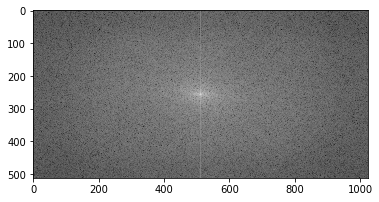

In [59]:
img1_dft = np.fft.fftshift(np.fft.fft2(image1))
plt.imshow(np.log(np.abs(img1_dft)),'gray')
plt.show()

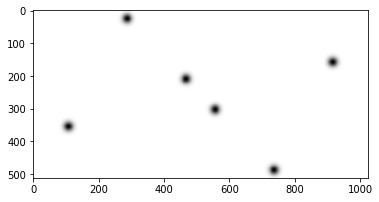

In [60]:
a,b = np.shape(img1_dft)
coordinates_gauss = [[209.4,467.5],[25.25,287.45],[157.9,916]]

bs = np.ones(np.shape(img1_dft))

D0 = 10
for coors in coordinates_gauss:
     bs *= notch_gauss(img1_dft, coors[0],coors[1] ,D0)
plt.imshow(bs,'gray')
plt.show()

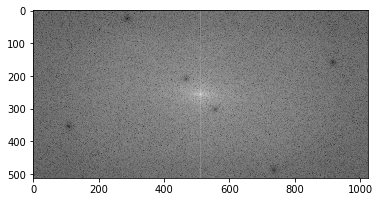

In [61]:
img1_dft_fil = img1_dft * bs
plt.imshow(np.log(np.abs(img1_dft_fil)),'gray')
plt.show()

In [62]:
last1 = np.real(np.fft.ifft2(np.fft.ifftshift(img1_dft_fil)))

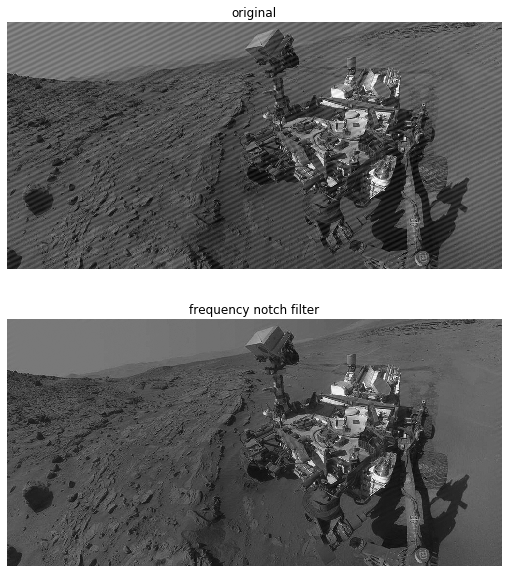

In [63]:
plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(2,1,1)
plt.imshow(image1,'gray',vmin = 0, vmax = 255)
plt.title('original')
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(last1,'gray',vmin = 0, vmax = 255)
plt.title('frequency notch filter')
plt.axis('off')
plt.show()

# b

In [75]:
img2_dft = np.fft.fftshift(np.fft.fft2(image2))
plt.imshow(np.log(np.abs(img2_dft)),'gray')
plt.show()

In [76]:
a,b = np.shape(img2_dft)
coordinates_gauss = [[228.22,634.6],[91.8,882.7],[43,915.1]\
                    ,[250.9,35]]

bs = np.ones(np.shape(img2_dft))

D0 = 15
for coors in coordinates_gauss:
     bs *= notch_gauss(img2_dft, coors[0],coors[1] ,D0)
plt.imshow(bs,'gray')
plt.show()

In [77]:
img2_dft_fil = img2_dft * bs
plt.imshow(np.log(np.abs(img2_dft_fil)),'gray')
plt.show()

In [78]:
last2 = np.real(np.fft.ifft2(np.fft.ifftshift(img2_dft_fil)))

In [79]:
plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(2,1,1)
plt.imshow(image2,'gray',vmin = 0, vmax = 255)
plt.title('original')
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(last2,'gray',vmin = 0, vmax = 255)
plt.title('frequency notch filter')
plt.axis('off')
plt.show()

In [89]:
plt.imshow(image3)

# c

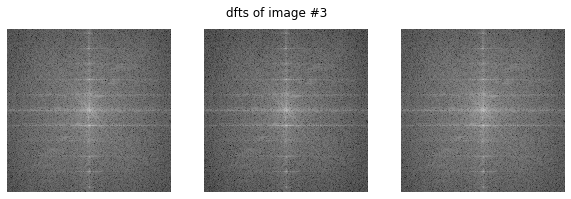

In [11]:
chs3 = img_chnnls(image3)
dft3 = dft_chnnls(chs3)
show_dfts(dft3,'3')

In [12]:
a,b = np.shape(dft3[0])
coordinates_gauss = [[23.05,b/2],[90.52,b/2],[292.48,b/2]\
                    ,[225.46,b/2],[158,b/2]]
coordinates_hor = [23.05,90.52,292.48,225.46,158]

bs = np.ones(np.shape(dft3[0]))

D0 = 15
for coors in coordinates_gauss:
     bs *= notch_gauss(dft3[0], coors[0],coors[1] ,D0)

D0 = 2
for coors in coordinates_hor:
     bs *= notch_hor(dft3[0], coors, D0)

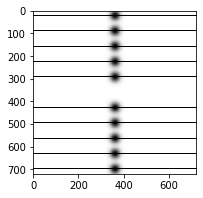

In [13]:
plt.imshow(bs,'gray')
plt.show()

In [14]:
dft_fil3 = np.array(dft3)

channels_to_filter = [0,1,2]
for xx in channels_to_filter:
    dft_fil3[xx] = dft3[xx] * bs

C:\Users\sherw\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


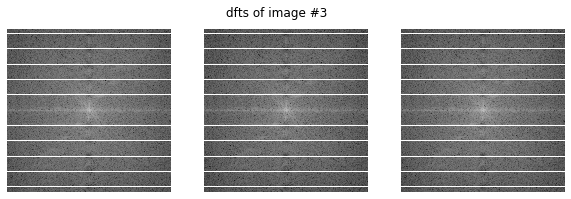

In [15]:
show_dfts(dft_fil3,'3')

In [16]:
invdft3 = inv_dfts(dft_fil3)

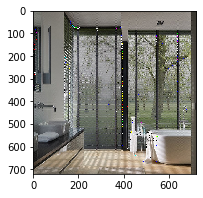

In [17]:
last3 = rgb(invdft3)

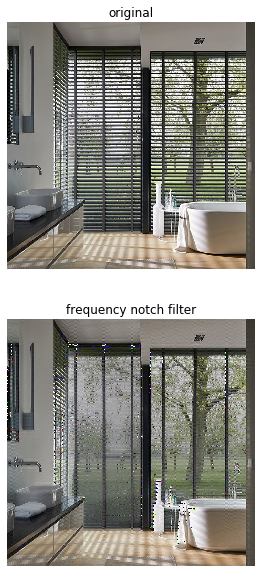

In [32]:
plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(2,1,1)
plt.imshow(image3,'gray',vmin = 0, vmax = 255)
plt.title('original')
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(last3,'gray',vmin = 0, vmax = 255)
plt.title('frequency notch filter')
plt.axis('off')
plt.show()